In [218]:
import dense_basis as db
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import os
from spec_id import Gaussian_prior
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from scipy import stats
from time import time
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [144]:
db.priors.sample_tx_prior(size =30)

array([[0.38851349, 0.51997494, 0.8076376 ],
       [0.43901961, 0.67912504, 0.84844088],
       [0.46680287, 0.64650213, 0.78399139],
       [0.41108885, 0.65350701, 0.81587757],
       [0.35149747, 0.50037071, 0.75539986],
       [0.44517551, 0.5701916 , 0.72043277],
       [0.33243432, 0.47289649, 0.61859709],
       [0.35609579, 0.47418786, 0.60726343],
       [0.36990841, 0.63303152, 0.75258929],
       [0.33700674, 0.56224286, 0.86829731],
       [0.33230828, 0.4453276 , 0.76041293],
       [0.49185706, 0.56520127, 0.80666318],
       [0.33838889, 0.49714417, 0.63278789],
       [0.3799341 , 0.6515493 , 0.78192099],
       [0.37372553, 0.5300541 , 0.83155398],
       [0.43022433, 0.60468071, 0.77158627],
       [0.44987308, 0.62178421, 0.72460125],
       [0.3361066 , 0.57827486, 0.79764469],
       [0.323111  , 0.41909574, 0.67970876],
       [0.37460633, 0.53702342, 0.78876941],
       [0.44442438, 0.68161371, 0.80840292],
       [0.43482369, 0.69163136, 0.83540725],
       [0.

(0, 1)

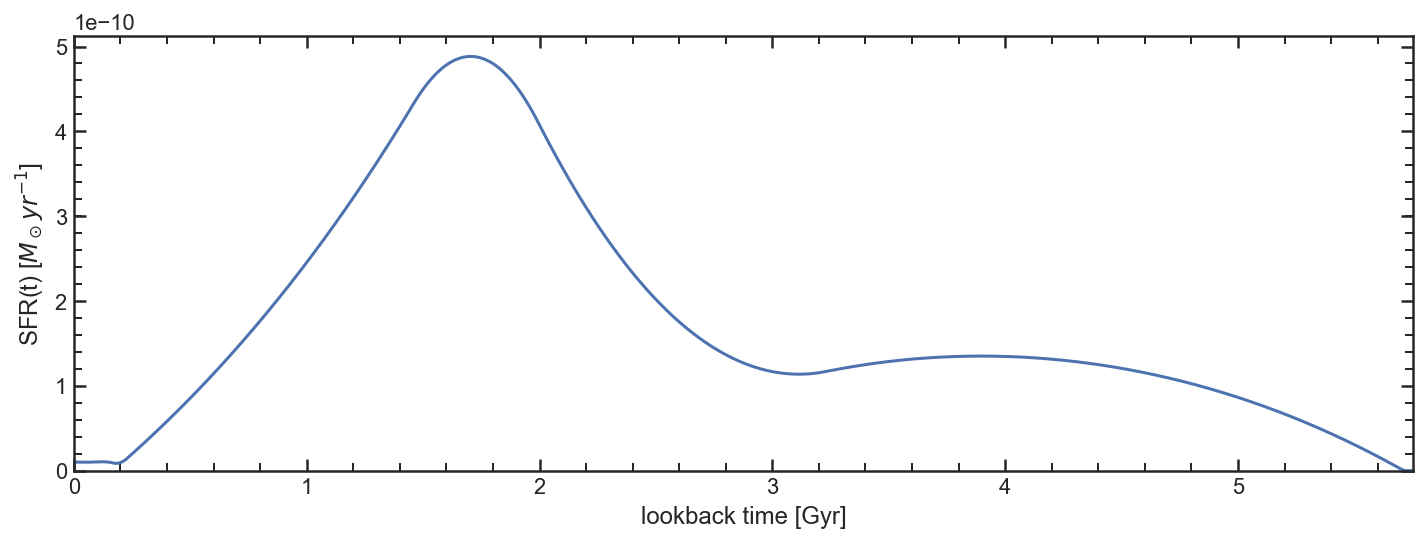

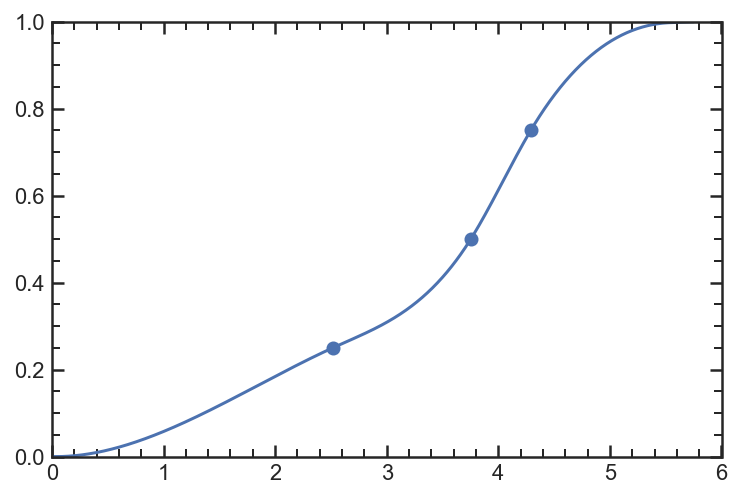

In [185]:
Nparam = 3
redshift = 1.0
logMstar = 0

# logssfrs = np.arange(9,14,0.01)
# logSFR = - np.random.choice(logssfrs,1)[0]
logSFR = - 11

# p75, P50, P25 = np.random.rand(3)
# lot = 1 - p75
# p50 = lot * P50 + p75
# lot = 1 - p50
# p25 = lot* P25 + p50


# t75, t50, t25 = np.array([p75,p50,p25]) * cosmo.age(1).value
p75 = Gaussian_prior(np.random.rand(1), [0,1], 0.25, 0.2)[0]
p50 = Gaussian_prior(np.random.rand(1), [p75,1], 0.5, 0.2)[0]
p25 = Gaussian_prior(np.random.rand(1), [p50,1], 0.75, 0.2)[0]
t75, t50, t25 = np.array([p75,p50,p25]) * cosmo.age(1).value

# sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t25,redshift), db.scale_t50(t50,redshift), db.scale_t50(t75,redshift)])
sfh_tuple = np.hstack([logMstar, logSFR, Nparam, 1-p25,1-p50,1-p75])
# sfh_tuple = np.hstack([logMstar, logSFR, Nparam, p75,p50,p25])

sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)

plt.figure()
plt.plot(timeax, np.cumsum(sfh) / np.cumsum(sfh[::-1])[-1])
plt.scatter(cosmo.age(1).value - np.array([t75,t50,t25]), np.array([0.75, 0.5, 0.25]))
plt.xlim(0,6)
plt.ylim(0,1)

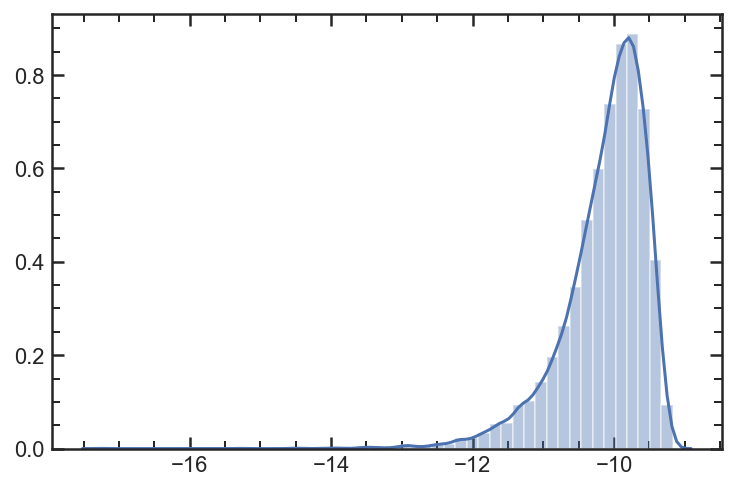

In [201]:
sea.distplot(db.priors.sample_sSFR_prior(size=10000))

In [202]:
Nparam = 3
redshift = 1.0
logMstar = 0

logssfrs = np.arange(8,14,0.01)

SFH_grid = []

for xx in range(1000):
#     logSFR = - np.random.choice(logssfrs,1)[0]
    logSFR = db.priors.sample_sSFR_prior(size=1)[0]

#     p75, P50, P25 = np.random.rand(3)
#     lot = 1 - p75
#     p50 = lot * P50 + p75
#     lot = 1 - p50
#     p25 = lot* P25 + p50

#     p75, p50, p25 = db.priors.sample_tx_prior(size =1)
    
    p75 = Gaussian_prior(np.random.rand(1), [0,1], 0.25, 0.2)[0]
    p50 = Gaussian_prior(np.random.rand(1), [p75,1], 0.5, 0.2)[0]
    p25 = Gaussian_prior(np.random.rand(1), [p50,1], 0.75, 0.2)[0]
    
    db.priors.sample_tx_prior(size =30)
    sfh_tuple = np.hstack([logMstar, logSFR, Nparam, 1-p25,1-p50,1-p75])

    sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)
    SFH_grid.append(sfh[::-1])
    
SFH_grid = np.array(SFH_grid)

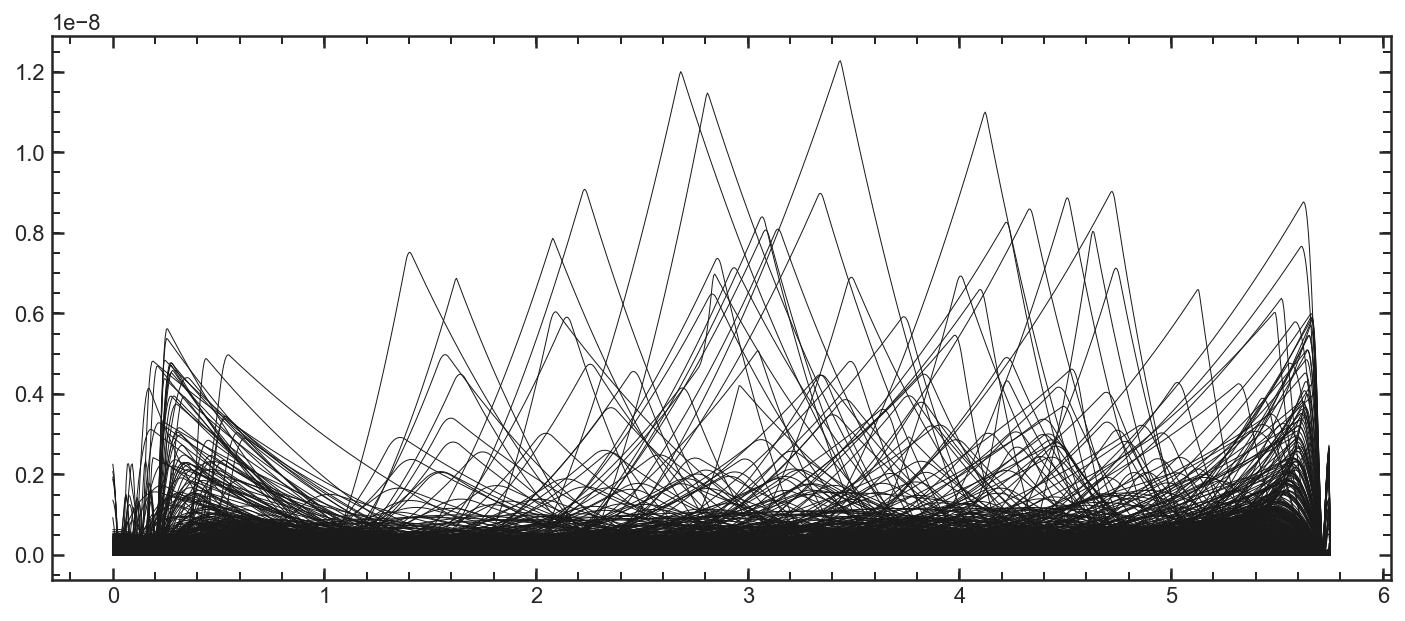

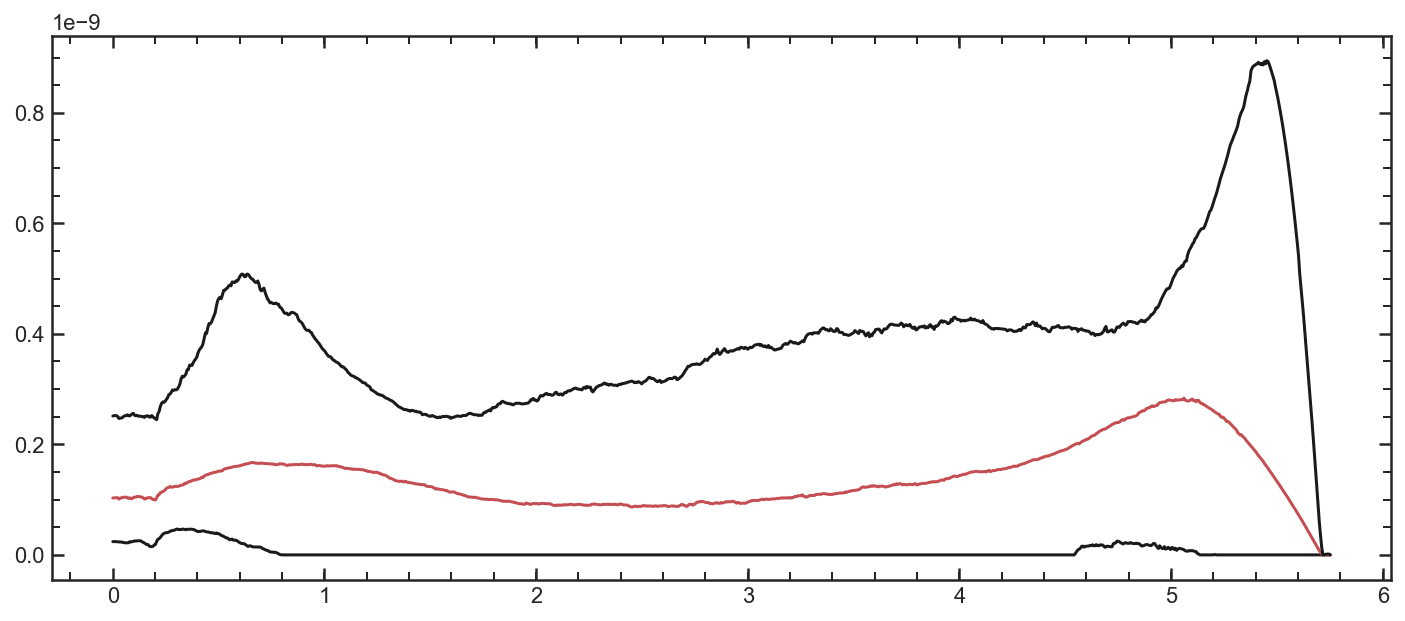

In [204]:
plt.figure(figsize=[12,5])
plt.plot(timeax, SFH_grid.T, 'k', linewidth = 0.5)
plt.figure(figsize=[12,5])
plt.plot(timeax, np.percentile(SFH_grid,16, axis=0), 'k')
plt.plot(timeax, np.percentile(SFH_grid,50, axis=0), 'r')
plt.plot(timeax, np.percentile(SFH_grid,84, axis=0), 'k')

In [97]:
t25,t50,t75

(5.692726431587164, 5.604680924488836, 5.572508511149837)

In [206]:
db.priors.print_priors()

--------------Priors:--------------
The prior on log mass is uniform from 9.0 to 12.0.
The prior on log SFR_inst is uniform from 2.0 to -1.0.
The prior on tx is dirichlet with alpha = 5.0.
The prior on redshift is uniform from 0.9 to 1.1.
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5.
The prior on dust (model: Calzetti) is uniform with Av: 0.0 to 1.0.
-----------------------------------


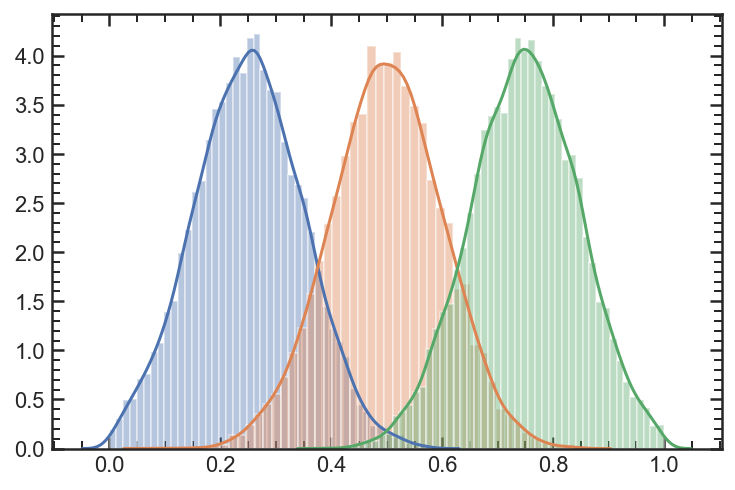

In [188]:
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.25, 0.1))
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.5, 0.1))
sea.distplot(Gaussian_prior(np.random.rand(10000), [0,1], 0.75, 0.1))

In [180]:
p75 = Gaussian_prior(np.random.rand(1), [0,1], 0.25, 0.2)
print(p75)
p50 = Gaussian_prior(np.random.rand(1), [p75,1], 0.5, 0.2)
print(p50)
p25 = Gaussian_prior(np.random.rand(1), [p50,1], 0.75, 0.2)
print(p25)

[0.50851541]
[0.70935496]
[0.82043088]


In [207]:
db.priors.squeeze_tx

True

In [264]:
temp_tx = np.cumsum(np.random.dirichlet(np.ones((Nparam+1,))*5, size=1))[0:-1]
print(temp_tx)
randfac1 = np.random.random()
randfac2 = np.random.random()
temp_tx = temp_tx*(1-randfac1*0.5) + (randfac1*0.5)*randfac2
print(temp_tx)

TypeError: dirichlet() got an unexpected keyword argument 'rnd_state'

In [270]:
p1,p2,p3=db.priors.sample_tx_prior(10000).T

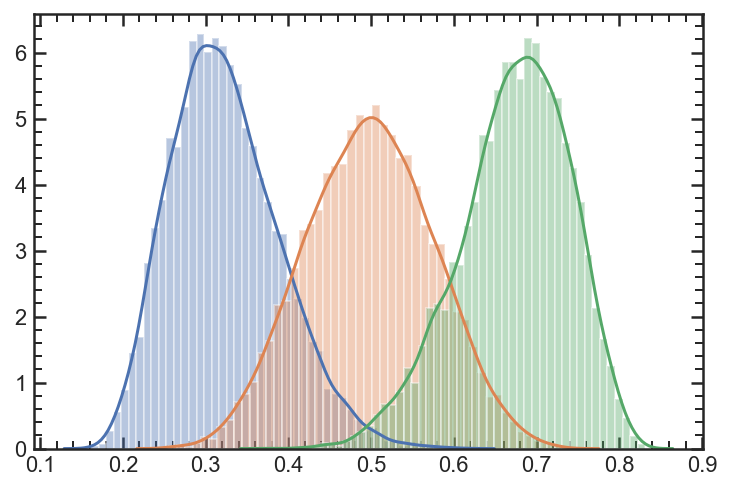

In [271]:
sea.distplot(p1)
sea.distplot(p2)
sea.distplot(p3)

In [235]:
stats.norm.ppf(0.4)

-0.2533471031357997

In [260]:
# plt.plot(np.arange(-4,4,0.001),stats.dirichlet.pdf(np.arange(-4,4,0.001),5))
stats.dirichlet.pdf([.25,0.5, 0.25],[5,5,5])

6.014156341552751

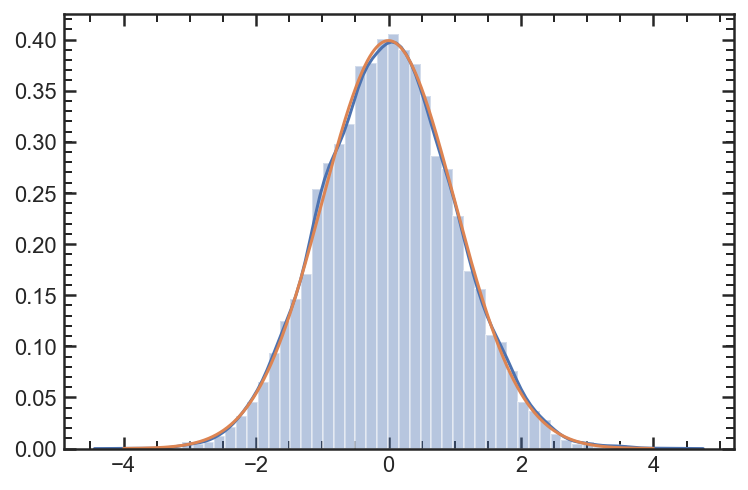

In [243]:
sea.distplot(stats.norm.ppf(np.random.rand(10000)))
plt.plot(np.arange(-4,4,0.001),stats.norm.pdf(np.arange(-4,4,0.001)))

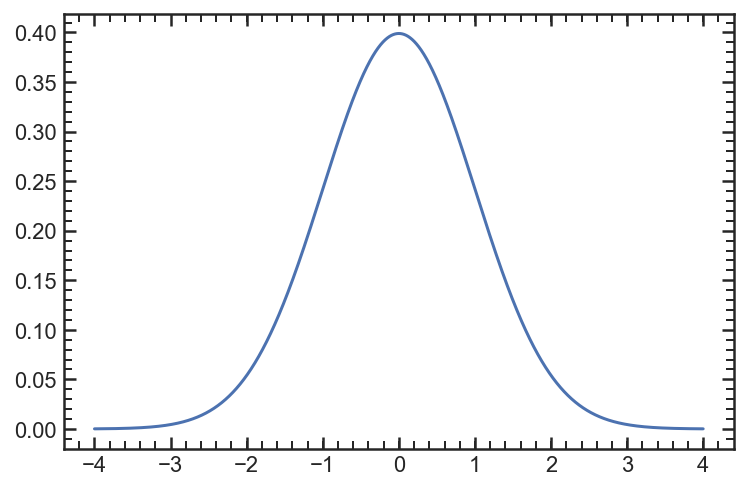

In [242]:
plt.plot(np.arange(-4,4,0.001),stats.norm.pdf(np.arange(-4,4,0.001)))